# Employee Salary Prediction

## Aim:- To Predict the Salary for the new employees by seeing the Interview scores

In [1]:
#Importing the Libraries

import numpy as npy
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#Importing the dataset

sal = pd.read_csv('salary_predict_dataset.csv')
sal.head()

,experience,test_score,interview_score,Salary
0,NaN,8.0,8.0,50000
1,NaN,5.0,4.0,22000
2,three,6.0,5.0,30000
3,five,9.0,9.0,55000
4,six,3.0,5.0,13000


In [3]:
# Finding of the Missing Values

sal.isnull().sum()

experience         5
test_score         1
interview_score    1
Salary             0
dtype: int64

In [4]:
# Finding of the Mean, Median and the infos of the given dataset

sal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   experience       15 non-null     object 
 1   test_score       19 non-null     float64
 2   interview_score  19 non-null     float64
 3   Salary           20 non-null     int64  
dtypes: float64(2), int64(1), object(1)
memory usage: 768.0+ bytes


In [5]:
#Filling of the Missing Values

sal['experience'] = sal['experience'].fillna(sal['experience'].mode()[0])
sal['test_score'] = sal['test_score'].fillna(sal['test_score'].mean())
sal['interview_score'] = sal['interview_score'].fillna(sal['interview_score'].mean())
sal.head()

,experience,test_score,interview_score,Salary
0,five,8.0,8.0,50000
1,five,5.0,4.0,22000
2,three,6.0,5.0,30000
3,five,9.0,9.0,55000
4,six,3.0,5.0,13000


In [6]:
sal.isnull().sum()

experience         0
test_score         0
interview_score    0
Salary             0
dtype: int64

<AxesSubplot: >

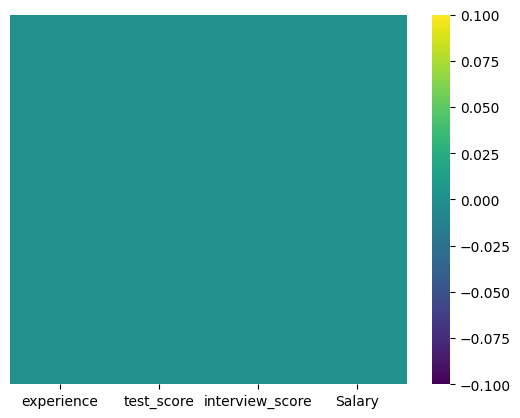

In [7]:
sns.heatmap(sal.isnull(),yticklabels=False,cmap='viridis')

In [8]:
# Handling of Categorical Features

sal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   experience       20 non-null     object 
 1   test_score       20 non-null     float64
 2   interview_score  20 non-null     float64
 3   Salary           20 non-null     int64  
dtypes: float64(2), int64(1), object(1)
memory usage: 768.0+ bytes


In [9]:
#Here experience is the one and only categorical feature so we are changing that into model learning datatype

sal['experience'].unique()

array(['five', 'three', 'six', 'ten', 'one', 'fifteen', 'thirteen',
       'four', 'eleven', 'twelve'], dtype=object)

In [10]:
sal['experience'] = sal['experience'].map({'five':5,'three':3,'six':6,'ten':10,'one':1,'fifteen':15,'thirteen':13,'four':4,
                                          'eleven':11,'twelve':12})
sal.head()

,experience,test_score,interview_score,Salary
0,5,8.0,8.0,50000
1,5,5.0,4.0,22000
2,3,6.0,5.0,30000
3,5,9.0,9.0,55000
4,6,3.0,5.0,13000


In [11]:
sal['experience'].unique()

array([ 5,  3,  6, 10,  1, 15, 13,  4, 11, 12], dtype=int64)

In [12]:
sal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   experience       20 non-null     int64  
 1   test_score       20 non-null     float64
 2   interview_score  20 non-null     float64
 3   Salary           20 non-null     int64  
dtypes: float64(2), int64(2)
memory usage: 768.0 bytes


In [33]:
# Separating of Dependent and Independent Features

X = sal.iloc[:,:-1]
X.head()

,experience,test_score,interview_score
0,5,8.0,8.0
1,5,5.0,4.0
2,3,6.0,5.0
3,5,9.0,9.0
4,6,3.0,5.0


In [34]:
y = sal.iloc[:,-1,]
y.head()

0    50000
1    22000
2    30000
3    55000
4    13000
Name: Salary, dtype: int64

### Creating the Model

In [35]:
#Test Train Split

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

In [36]:
#Applying Linear Regression

from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()
rf.fit(X,y)

RandomForestRegressor()

In [37]:
train_score = rf.score(X_train,y_train)
train_score

0.9638495677113642

In [38]:
test_score = rf.score(X_test,y_test)
test_score

0.9943625401625401

In [39]:
pred = rf.predict(X_test)
pred

array([49340., 14015., 54330., 23585.])

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot: xlabel='Salary', ylabel='Density'>

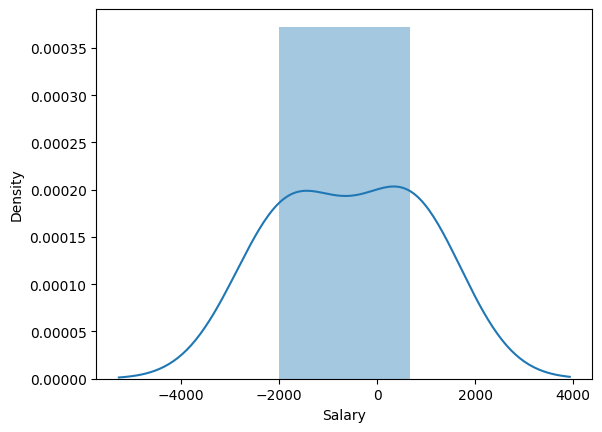

In [40]:
sns.distplot(y_test-pred)

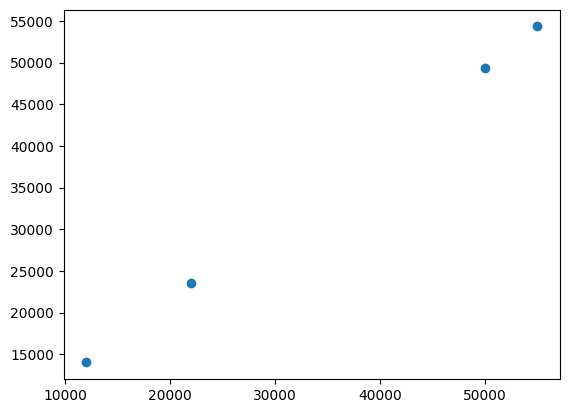

In [41]:
plt.scatter(y_test,pred)

In [49]:
print(rf.feature_names_in_)

['experience' 'test_score' 'interview_score']


In [42]:
#Dump into Pickle

import pickle

file = open('random_forest_regression_model.pkl','wb')

pickle.dump(rf, file)